In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing


In [2]:
data = fetch_california_housing()

/home/gemac/Desktop/form-finep/.venv/lib/python3.11/site-packages/sklearn/datasets/_base.py:1472: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976036
  warnings.warn(f"Retry downloading from url: {remote.url}")


In [8]:
data 

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [14]:
#transofmando em df
df = pd.DataFrame( data.data)
df.columns = data.feature_names
df['MedHouseVal'] = data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
df.shape

(20640, 9)

Regressão Linear Simples

In [18]:
# separando x e y
X = df.MedInc
y = df.MedHouseVal

In [19]:
#seprando em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train)

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [25]:
#avaliando o erro

y_pred = reg.predict(X_test.values.reshape(-1,1))

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))




0.6265986453094171
0.7028461448540977


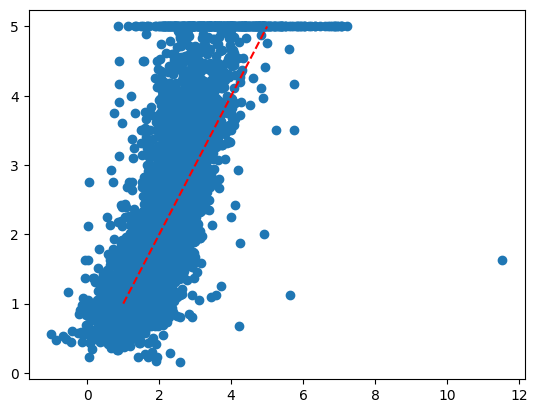

In [45]:
#plotando  a relação de y_test com o y_pred

fig, ax = plt.subplots()

ax.scatter(y_pred, y_test)
ax.plot([1,5],[1,5], '--r')


plt.show()

Regressão Linear Múltipla

In [27]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [35]:
X = df.drop('MedHouseVal', axis= 1)
y = df.MedHouseVal

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
reg = LinearRegression().fit(X_train, y_train)

In [38]:
print(f'Erro Coef_: ',reg.coef_)
print(f'Erro intercept_: ',reg.intercept_)

Erro Coef_:  [ 4.44870466e-01  9.55004561e-03 -1.21991503e-01  7.79144696e-01
 -7.68990809e-08 -3.29948505e-03 -4.19131153e-01 -4.34103468e-01]
Erro intercept_:  -37.082010939079765


In [39]:
y_pred = reg.predict(X_test)

In [40]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.5295710106684457
0.5369686543372452


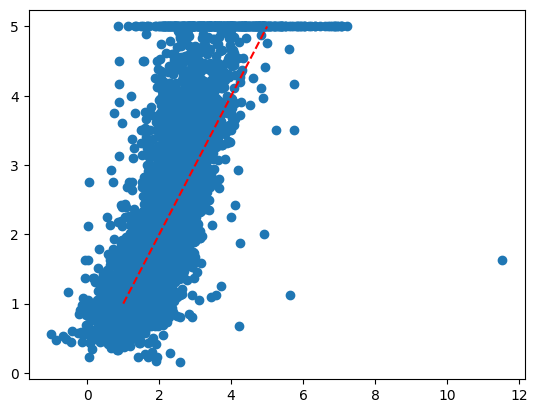

In [44]:
fig, ax = plt.subplots()

ax.scatter(y_pred, y_test)
ax.plot([1,5],[1,5], '--r')

plt.show()